### Precious Metals stock  - GFI - Gold Fields Ltd (GFI)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from datetime import datetime
import requests

In [2]:
# Diana api key - alpha_vantage website
API_KEY = '8LTXLFXQ2BUKFSOQ'

1. american company:  FB Meta Platforms Inc

2. canadina company: SHOP.TRT - shopify

3. precious metals - GFI  - Gold Fields Ltd

4. real estate : CIGI - Colliers International Group Stock

5. travel sector : BKNG -  Booking Holdings Inc

In [3]:
df = pd.read_csv("aggregated_data.csv")
df.columns = ["Date", "Total deaths", "Total confirmed"]
df

,Date,Total deaths,Total confirmed
0,1/22/20,17,557
1,1/23/20,18,657
2,1/24/20,26,944
3,1/25/20,42,1437
4,1/26/20,56,2120
...,...,...,...
816,4/17/22,6198487,504619899
817,4/18/22,6199914,505089291
818,4/19/22,6203317,506082451
819,4/20/22,6207815,507046645


### import the data from step 3 

In [4]:
# make indexes look alike as the stock market
df['Date']=df['Date'].astype(str)
df['Date']=pd.to_datetime(df['Date'].astype(str))

df


,Date,Total deaths,Total confirmed
0,2020-01-22,17,557
1,2020-01-23,18,657
2,2020-01-24,26,944
3,2020-01-25,42,1437
4,2020-01-26,56,2120
...,...,...,...
816,2022-04-17,6198487,504619899
817,2022-04-18,6199914,505089291
818,2022-04-19,6203317,506082451
819,2022-04-20,6207815,507046645


In [5]:
df.set_index('Date', inplace=True)
df

,Total deaths,Total confirmed
Date,,
2020-01-22,17,557
2020-01-23,18,657
2020-01-24,26,944
2020-01-25,42,1437
2020-01-26,56,2120
...,...,...
2022-04-17,6198487,504619899
2022-04-18,6199914,505089291
2022-04-19,6203317,506082451


### Gold Fields 

### stock market info using alpha_vantage 

In [6]:
ts = TimeSeries(key='API_KEY', output_format='pandas')
data, meta = ts.get_daily(symbol='GFI',outputsize='full')

data.sort_values(by='date', ascending=True, inplace=True)
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1999-11-01,4.69,4.69,4.190,4.25,303600.0
1999-11-02,4.50,4.56,4.440,4.50,257600.0
1999-11-03,4.53,4.59,4.310,4.50,175500.0
1999-11-04,4.44,4.59,4.310,4.34,73300.0
1999-11-05,4.31,4.50,4.310,4.37,68700.0
...,...,...,...,...,...
2022-04-18,15.77,16.92,15.770,16.23,10026590.0
2022-04-19,15.86,15.86,14.130,14.35,13373264.0
2022-04-20,14.49,14.98,14.335,14.96,4187751.0


In [7]:
data.tail(3)
data = data.drop(index='2022-04-22')
data.tail(3)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-04-19,15.86,15.86,14.130,14.35,13373264.0
2022-04-20,14.49,14.98,14.335,14.96,4187751.0
2022-04-21,14.68,14.76,13.770,14.00,8483041.0


### data prepration and cleaning - same date frame

In [8]:
data = data.drop(data.index[0:5086])



In [9]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-01-21,6.20,6.37,6.16,6.36,4251161.0
2020-01-22,6.36,6.39,6.18,6.35,3675139.0
2020-01-23,6.23,6.41,6.20,6.24,4848673.0
2020-01-24,6.24,6.44,6.23,6.43,3206982.0
2020-01-27,6.50,6.55,6.25,6.35,6202623.0


In [10]:
data.columns = ["open", "GFI-High", "GFI-Low", "close" ,"volume"]
data

,open,GFI-High,GFI-Low,close,volume
date,,,,,
2020-01-21,6.20,6.37,6.160,6.36,4251161.0
2020-01-22,6.36,6.39,6.180,6.35,3675139.0
2020-01-23,6.23,6.41,6.200,6.24,4848673.0
2020-01-24,6.24,6.44,6.230,6.43,3206982.0
2020-01-27,6.50,6.55,6.250,6.35,6202623.0
...,...,...,...,...,...
2022-04-14,15.20,15.36,14.970,15.36,4211049.0
2022-04-18,15.77,16.92,15.770,16.23,10026590.0
2022-04-19,15.86,15.86,14.130,14.35,13373264.0


### remove columns 

In [11]:
data = data.drop(["open","close","volume"], axis=1)
data

,GFI-High,GFI-Low
date,,
2020-01-21,6.37,6.160
2020-01-22,6.39,6.180
2020-01-23,6.41,6.200
2020-01-24,6.44,6.230
2020-01-27,6.55,6.250
...,...,...
2022-04-14,15.36,14.970
2022-04-18,16.92,15.770
2022-04-19,15.86,14.130


### merging the covid data with the stock data - 4 final colunms 

In [12]:
#This is will keep all data and fill Nan where it's missing 
# shopify_res = pd.concat([df, data], axis=1)

#This is will keep only the filled data - and remove empty cells
gold_res = pd.concat([data, df], axis=1, join="inner")
gold_res

,GFI-High,GFI-Low,Total deaths,Total confirmed
2020-01-22,6.39,6.180,17,557
2020-01-23,6.41,6.200,18,657
2020-01-24,6.44,6.230,26,944
2020-01-27,6.55,6.250,82,2929
2020-01-28,6.20,5.900,131,5580
...,...,...,...,...
2022-04-14,15.36,14.970,6193401,502932802
2022-04-18,16.92,15.770,6199914,505089291
2022-04-19,15.86,14.130,6203317,506082451
2022-04-20,14.98,14.335,6207815,507046645


## Plot 

#### we have the merged data for covid and this stocks 

<Figure size 1440x1440 with 0 Axes>

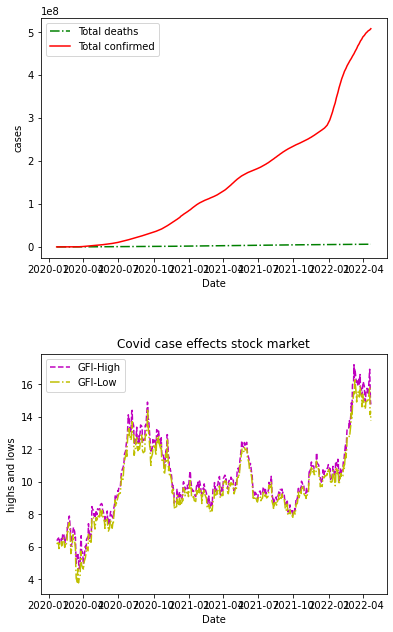

In [20]:
x = np.arange(0, 565,1)


s1 = gold_res["Total deaths"]
s2 = gold_res["Total confirmed"]
s3 = gold_res["GFI-High"]
s4 = gold_res["GFI-Low"]

plt.figure(figsize=(20,20))
fig, axs = plt.subplots(2, 1)
axs[0].plot(s1, 'g-.', label="Total deaths")
axs[0].plot(s2, 'r-', label="Total confirmed")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('cases')               
axs[0].legend()

axs[1].plot(s3, 'm--', label="GFI-High")
axs[1].plot(s4, 'y-.', label="GFI-Low")
axs[1].set_xlabel('Date')
axs[1].set_ylabel('highs and lows')
axs[1].legend()




plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)

plt.title("Covid case effects stock market")

plt.show()



## Final result - covid cases and stock data 